In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
import pyLDAvis
import pyLDAvis.gensim_models 

## 1 Reading the data

In [4]:
df = pd.read_json('data/train_reviews.json')

First thoughts are to adjust the values in stars columns and the url

In [5]:
df.head()

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium


In [6]:
df.keys()

Index(['date', 'title', 'text', 'url', 'stars'], dtype='object')

In [7]:
# Checking the number of reviews
len(df.index)

2021

In [8]:
# Checking if there any empty values
df.isnull().values.any()

False

In [9]:
# check the data frame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    2021 non-null   datetime64[ns, UTC]
 1   title   2021 non-null   object             
 2   text    2021 non-null   object             
 3   url     2021 non-null   object             
 4   stars   2021 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 79.1+ KB
None


In [10]:
df

,date,title,text,url,stars
0,2015-10-10 14:32:51+00:00,Bad customer service. Staff are very impolite ...,Used national rail twice and on both occasions...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
1,2015-09-22 17:04:56+00:00,Pretty awful service,I phoned National rail to find out why several...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
2,2015-03-13 23:37:05+00:00,Awful staff,I travel from Brokenhast to southampton centra...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-1 star-rating--medium
3,2015-01-13 12:26:52+00:00,Very good,Saved about £50 on a single trip using Nationa...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
4,2011-05-28 15:00:36+00:00,Check it out.,I always use the national rail enquiry site wh...,https://uk.trustpilot.com/review/www.nationalr...,star-rating star-rating-4 star-rating--medium
...,...,...,...,...,...
2016,2017-07-06 20:20:58+00:00,Late,"Late, cancelled, signal failures, too much rai...",https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium
2017,2016-11-29 10:26:41+00:00,Not sure why they even have timetables,Trains are constantly delayed or cancelled. I ...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-1 star-rating--medium
2018,2016-07-17 07:42:11+00:00,Helpful guards,On a yearly basis we take a group of Preschool...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-5 star-rating--medium
2019,2016-05-22 12:25:51+00:00,Often late but clean and decent.,I travel by them every day. I like their newis...,https://uk.trustpilot.com/review/www.southeast...,star-rating star-rating-3 star-rating--medium


## Cleaning the data
I see in the data title and text where I will focus for the reviews. I will chech the url and stars and decide if I can adjustt their information.

Processing the url column to have the train companies

In [11]:
df['url'].unique()

array(['https://uk.trustpilot.com/review/www.nationalrail.co.uk?page=4',
       'https://uk.trustpilot.com/review/www.nationalrail.co.uk?page=2',
       'https://uk.trustpilot.com/review/www.nationalrail.co.uk?page=3',
       'https://uk.trustpilot.com/review/www.nationalrail.co.uk?page=1',
       'https://uk.trustpilot.com/review/sleeper.scot',
       'https://uk.trustpilot.com/review/www.nationalrail.co.uk',
       'https://uk.trustpilot.com/review/www.eastmidlandstrains.co.uk?page=1',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=2',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=3',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=4',
       'https://uk.trustpilot.com/review/www.eastmidlandstrains.co.uk',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=6',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=7',
       'https://uk.trustpilot.com/review/www.virgintrains.co.uk?page=8

In [12]:
'''Create another column based on the url reviews 
and their targeting companies
'''
df['url'] = df['url'].apply(lambda url: url.split('?')[0].split('https://uk.trustpilot.com/review/')[1])
df['url'] = df['url'].apply(lambda x: x.replace('www.','').split('.co')[0])
df['url'].unique()

array(['nationalrail', 'sleeper.scot', 'eastmidlandstrains',
       'virgintrains', 'virgintrainseastcoast', 'eurostar',
       'arrivatrainswales', 'buytickets.crosscountrytrains',
       'chilternrailways', 'southernrailway', 'gwr', 'grandcentralrail',
       'tpexpress', 'hulltrains', 'southwesternrailway',
       'londonnorthwesternrailway', 'southeasternrailway'], dtype=object)

In [13]:
# Adjust star columns
df['stars'].unique()

array(['star-rating star-rating-1 star-rating--medium',
       'star-rating star-rating-4 star-rating--medium',
       'star-rating star-rating-5 star-rating--medium',
       'star-rating star-rating-2 star-rating--medium',
       'star-rating star-rating-3 star-rating--medium'], dtype=object)

In [14]:
df['stars'] = df['stars'].apply(lambda star: star.split('star-rating ')[1].split(' star-rating--')[0])
df['stars'].unique()

array(['star-rating-1', 'star-rating-4', 'star-rating-5', 'star-rating-2',
       'star-rating-3'], dtype=object)

### Checking for duplicate entries

In [15]:
df[df.duplicated(keep=False)]


,date,title,text,url,stars
37,2018-07-16 21:01:22+00:00,Isn't possible to review them with 0…,Isn't possible to review them with 0 stars?!,nationalrail,star-rating-1
46,2018-07-11 08:41:10+00:00,I hunted for a review site just so I…,I hunted for a review site just so I can share...,nationalrail,star-rating-1
47,2018-07-05 18:15:30+00:00,A total nightmare!!!,"The most disgraceful, useless and totally inco...",nationalrail,star-rating-1
48,2018-07-05 17:18:47+00:00,I have never had a time where the…,I have never had a time where the trains have ...,nationalrail,star-rating-1
49,2018-07-04 07:08:13+00:00,Always cancel always delayed never…,Always cancel always delayed never travel in y...,nationalrail,star-rating-1
...,...,...,...,...,...
1977,2018-03-04 13:28:18+00:00,Woefully incompetent,"Woefully incompetent, I opened a complaint in ...",tpexpress,star-rating-1
1978,2018-03-04 12:11:13+00:00,On Thursday 1 March and travelling from…,On Thursday 1 March and travelling from Scarbo...,tpexpress,star-rating-5
1979,2018-01-22 08:10:20+00:00,Clean trains with conductors going …,Clean trains with conductors going through the...,tpexpress,star-rating-5
1980,2018-01-21 11:09:37+00:00,Horrible customer service,Horrible customer service!,tpexpress,star-rating-1


**NOTE** First remove the duplicates


In [16]:
# Remove the duplicates

df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [17]:
# Checking the Unique number of reviews
len(df.index)

1441

Some text pre-processing on the reviews column:
* Expading the contractions
* Making lower case
* Removing digits and words containing digits
* Removing short words

In [18]:
import re
import string
import contractions

df['text'][0]

"Used national rail twice and on both occasions I found the staff unpleasant, unfriendly and incompetent. Wasn't helpful in regards to platform information and general customer service skills."

Expanding the contractions

In [19]:
#expand contractions
df['text'] = df['text'].apply(lambda x : contractions.fix(x))

C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/3104402523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x : contractions.fix(x))


In [20]:
df['text'][0]

'Used national rail twice and on both occasions I found the staff unpleasant, unfriendly and incompetent. was not helpful in regards to platform information and general customer service skills.'

In [21]:
# Make the reviews lower case
df['cleaned']=df['text'].apply(lambda x: x.lower())

# Remove digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

# remove short words (length < 3)
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([w for w in nltk.tokenize.word_tokenize(x) if len(w)>2]))

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/3324087924.py:5: DeprecationWarning: invalid escape sequence \w
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/3324087924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned']=df['text'].apply(lambda x: x.lower())
C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/3324087924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [22]:
# checking number of reviews per rating
df.groupby(['stars']).size().reset_index(name='count').sort_values(by = 'count')

,stars,count
2,star-rating-3,39
3,star-rating-4,45
1,star-rating-2,107
4,star-rating-5,121
0,star-rating-1,1129


Plotting the numbers of negative vs positive reviews. However we can see above that the negative are way more than positive reviews. 
The assumption that is taken is that 0 or 1 is negative and 4 or 5 stars is positive review (3 stars is excluded).

In [23]:
df_pos_neg = df[df['stars'] != 'star-rating-3']

In [24]:
df_pos_neg['reviews'] =  df['stars'].apply(lambda x: 'negative' if x == 'star-rating-1' or x == 'star-rating-2' else 'positive')

C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/2306122348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_neg['reviews'] =  df['stars'].apply(lambda x: 'negative' if x == 'star-rating-1' or x == 'star-rating-2' else 'positive')


c:\program files\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


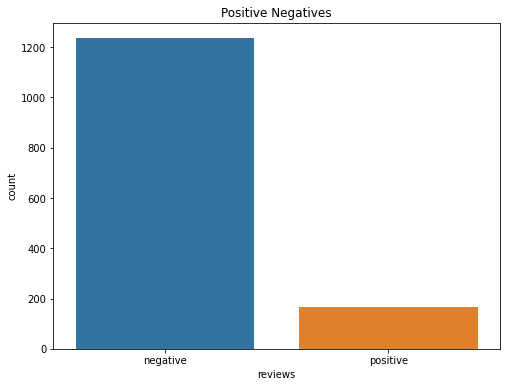

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(df_pos_neg['reviews'])
plt.title('Positive Negatives')
plt.show()

We can see that most of the reviews are negative. I quess this will affect the Topic Modeling; most of the topics will relate on complains regarding delays etc

 Proceed with more text processing
 * Lemmatization
 * POSTagging: keeping only Nouns and Adj

In [26]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [27]:
tokenized_reviews = pd.Series([w for w in df['cleaned']]).apply(lambda x: x.split())

In [28]:
tokenized_reviews

0       [used, national, rail, twice, and, both, occas...
1       [phoned, national, rail, find, out, why, sever...
2       [travel, from, brokenhast, southampton, centra...
3       [saved, about, single, trip, using, nationalra...
4       [always, use, the, national, rail, enquiry, si...
                              ...                        
1436    [late, cancelled, signal, failures, too, much,...
1437    [trains, are, constantly, delayed, cancelled, ...
1438    [yearly, basis, take, group, preschool, childr...
1439    [travel, them, every, day, like, their, newish...
1440                        [start, with, the, positives]
Length: 1441, dtype: object

In [29]:
reviews = lemmatization(tokenized_reviews)

Starting the Topic extraction with LDA

In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

c:\program files\python39\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [31]:
# Creating a document term matricx and a dictionary
id2word = corpora.Dictionary(reviews)

doc_term_matrix = [id2word.doc2bow(rev) for rev in reviews]

In [32]:
# Creating the object for LDA model starting with number of topics =3
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model_3 = LDA(corpus=doc_term_matrix, id2word=id2word, num_topics=3, passes=50)

In [33]:
lda_model_3.print_topics()

[(0,
  '0.062*"train" + 0.028*"service" + 0.021*"time" + 0.015*"seat" + 0.015*"class" + 0.014*"first" + 0.013*"journey" + 0.011*"bad" + 0.010*"ticket" + 0.010*"southern"'),
 (1,
  '0.050*"train" + 0.042*"ticket" + 0.022*"service" + 0.021*"virgin" + 0.016*"customer" + 0.013*"time" + 0.012*"staff" + 0.009*"website" + 0.009*"day" + 0.008*"hour"'),
 (2,
  '0.041*"customer" + 0.029*"service" + 0.012*"bad" + 0.009*"staff" + 0.007*"poor" + 0.007*"refund" + 0.007*"company" + 0.006*"experience" + 0.006*"phone" + 0.006*"eurostar"')]

Many commmon words in the topics. Remove some of the extremes (those that are found in less than 15 or more than the 50% of the reviews)

In [34]:
# New document term matrix and a dictionary
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n= 100000)

doc_term_matrix = [id2word.doc2bow(rev) for rev in reviews]

In [35]:
#Build LDA model (number of topics =3)
lda_model_3 = LDA(corpus=doc_term_matrix, id2word=id2word, num_topics=3, passes=50)

In [36]:
lda_model_3.print_topics()

[(0,
  '0.045*"service" + 0.037*"staff" + 0.037*"time" + 0.036*"bad" + 0.022*"company" + 0.022*"southern" + 0.019*"people" + 0.019*"passenger" + 0.018*"station" + 0.015*"virgin"'),
 (1,
  '0.061*"service" + 0.055*"seat" + 0.030*"virgin" + 0.025*"hour" + 0.022*"delay" + 0.022*"journey" + 0.020*"time" + 0.017*"day" + 0.017*"week" + 0.016*"terrible"'),
 (2,
  '0.102*"ticket" + 0.036*"customer" + 0.031*"service" + 0.030*"class" + 0.028*"first" + 0.025*"virgin" + 0.024*"time" + 0.019*"refund" + 0.019*"website" + 0.018*"eurostar"')]

Topics seems to get more clear

In [37]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_3, doc_term_matrix, id2word)
vis

c:\program files\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.173913 -0.002557       1        1  39.784507
0      0.089512 -0.129209       2        1  33.787378
1      0.084401  0.131765       3        1  26.428115, topic_info=            Term        Freq       Total Category  logprob  loglift
36        ticket  710.000000  710.000000  Default  30.0000  30.0000
100         seat  257.000000  257.000000  Default  29.0000  29.0000
10           bad  222.000000  222.000000  Default  28.0000  28.0000
132        class  210.000000  210.000000  Default  27.0000  27.0000
144     southern  128.000000  128.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
3    information   32.511725   52.142532   Topic3  -4.9553   0.8584
0       customer   63.525713  387.518870   Topic3  -4.2855  -0.4776
19        people   47.682120  185.864606   Topic3  -4.5724  -0.0297
314          gwr   33.786090   61.011067   Topic3  -4.9169   0.7397
96      carriage   33.307918   93.495874   Topic3  -4.9311   0.2986

[186 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
194       1  0.976764       account
172       1  0.972544        advice
193       2  0.976401  announcement
90        1  0.918912           app
90        2  0.068068           app
...     ...       ...           ...
102       1  0.178496          year
102       2  0.696135          year
102       3  0.133872          year
264       2  0.935689     yesterday
264       3  0.040682     yesterday

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

Try to increase one topic more; at 4

In [38]:
#Build LDA model  num_topics=4
lda_model_4 = LDA(corpus=doc_term_matrix, id2word=id2word, num_topics=4, passes=50)

In [39]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_4, doc_term_matrix, id2word)
vis

c:\program files\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002580 -0.162626       1        1  30.200383
2      0.050417  0.125340       2        1  25.988979
1     -0.211607  0.031910       3        1  24.433521
3      0.158610  0.005376       4        1  19.377118, topic_info=       Term        Freq       Total Category  logprob  loglift
36   ticket  712.000000  712.000000  Default  30.0000  30.0000
100    seat  257.000000  257.000000  Default  29.0000  29.0000
132   class  211.000000  211.000000  Default  28.0000  28.0000
123   first  209.000000  209.000000  Default  27.0000  27.0000
94   refund  138.000000  138.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
37   travel   31.334880  127.770786   Topic4  -4.6819   0.2356
55      due   29.036395  124.583693   Topic4  -4.7580   0.1846
99    month   26.690751   94.148978   Topic4  -4.8423   0.3805
86     work   26.247241   91.192719   Topic4  -4.8590   0.3957
52    delay   25.888572  102.919794   Topic4  -4.8728   0.2609

[237 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
188       4  0.983449  absolute
194       1  0.797016   account
194       4  0.177115   account
278       3  0.281471    action
278       4  0.731824    action
...     ...       ...       ...
192       4  0.810303     worth
102       1  0.160418      year
102       2  0.151506      year
102       3  0.320837      year
102       4  0.365397      year

[409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [40]:
#Build LDA model  num_topics=5
#lda_model_5 = LDA(corpus=doc_term_matrix, id2word=id2word, num_topics=5, passes=50)

In [41]:
#lda_model_5.print_topics()

In [42]:
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model_5, doc_term_matrix, id2word)
#vis

Seems the number of topics at 4. Over 4 we start having overlaps. Not a bad thing but since we deal with reviews the topics are not so many.

In [43]:
lda_model_4.print_topics()

[(0,
  '0.106*"ticket" + 0.046*"virgin" + 0.041*"customer" + 0.032*"staff" + 0.028*"service" + 0.023*"time" + 0.015*"station" + 0.015*"minute" + 0.014*"problem" + 0.014*"new"'),
 (1,
  '0.059*"seat" + 0.049*"class" + 0.046*"first" + 0.036*"service" + 0.035*"virgin" + 0.026*"journey" + 0.021*"staff" + 0.019*"carriage" + 0.016*"food" + 0.016*"people"'),
 (2,
  '0.067*"service" + 0.055*"time" + 0.022*"journey" + 0.018*"hour" + 0.017*"day" + 0.017*"other" + 0.017*"delay" + 0.017*"late" + 0.017*"week" + 0.015*"complaint"'),
 (3,
  '0.045*"service" + 0.044*"company" + 0.042*"ticket" + 0.040*"bad" + 0.038*"refund" + 0.028*"day" + 0.024*"customer" + 0.021*"price" + 0.021*"money" + 0.019*"time"')]

The topics start to make some sense:
* Topic_0 : staff, service
* Topic_1 : seat,class
* Topic_2 : service, time, delay
* Topic_3 : company, ticket, refund
 

Continue to see how the topic of each review 

In [44]:
# Checking how the review classified in that model
lda_reviews  = lda_model_4[doc_term_matrix]

In [45]:
[doc for doc in lda_reviews]

[[(0, 0.30358514), (1, 0.023469536), (2, 0.48067975), (3, 0.19226557)],
 [(0, 0.23106216), (1, 0.011193716), (2, 0.74610835), (3, 0.0116357915)],
 [(0, 0.77588123), (1, 0.013541224), (2, 0.014255865), (3, 0.19632176)],
 [(0, 0.029603884), (1, 0.25228554), (2, 0.6884684), (3, 0.029642178)],
 [(0, 0.01942801), (1, 0.018456297), (2, 0.45271233), (3, 0.5094034)],
 [(0, 0.9110432), (1, 0.029327128), (2, 0.030327445), (3, 0.029302206)],
 [(0, 0.56527513), (1, 0.019617485), (2, 0.3937633), (3, 0.021344073)],
 [(0, 0.028499987), (1, 0.02883906), (2, 0.59726214), (3, 0.34539878)],
 [(1, 0.021731691), (2, 0.89959085), (3, 0.07339545)],
 [(0, 0.066683955), (1, 0.06435477), (2, 0.06646965), (3, 0.80249166)],
 [(0, 0.052479398), (1, 0.053046614), (2, 0.052055053), (3, 0.84241897)],
 [(0, 0.1778235), (1, 0.013927463), (2, 0.40496337), (3, 0.40328565)],
 [(0, 0.8337749), (1, 0.058789484), (2, 0.055902593), (3, 0.051532988)],
 [(0, 0.5382758), (1, 0.016007086), (2, 0.016198276), (3, 0.42951888)],
 [(0

In [46]:
df['topic'] = ''

C:\Users\VALETO~1\AppData\Local\Temp/ipykernel_30304/2671560843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['topic'] = ''


In [47]:
# Not the best solution; but in terms of simplicity I retrieve the highest score only for assigning a review in  a specific Topic
# Normally I would calculate a threshhold per Topic and then check if a review have more than on topic
for doc, j in zip(lda_reviews,df.index):
    highest_topic = ''
    highest_score = -10
    for topic, score in doc:
        if score > highest_score:
            highest_topic = 'topic_' + str(topic)
            highest_score = score
    df.loc[j,'topic'] = highest_topic
    

c:\program files\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [48]:
df = df.sort_values(by="date")

In [49]:
df['agg_date'] = df.date.dt.strftime('%Y-%m')

In [50]:
df_grouped = df.groupby(["agg_date","topic"]).size().reset_index(name='num')

In [51]:
df_grouped

,agg_date,topic,num
0,2011-05,topic_3,1
1,2011-11,topic_1,1
2,2015-01,topic_1,1
3,2015-01,topic_2,1
4,2015-02,topic_0,1
...,...,...,...
151,2018-06,topic_3,22
152,2018-07,topic_0,12
153,2018-07,topic_1,17
154,2018-07,topic_2,22


c:\program files\python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


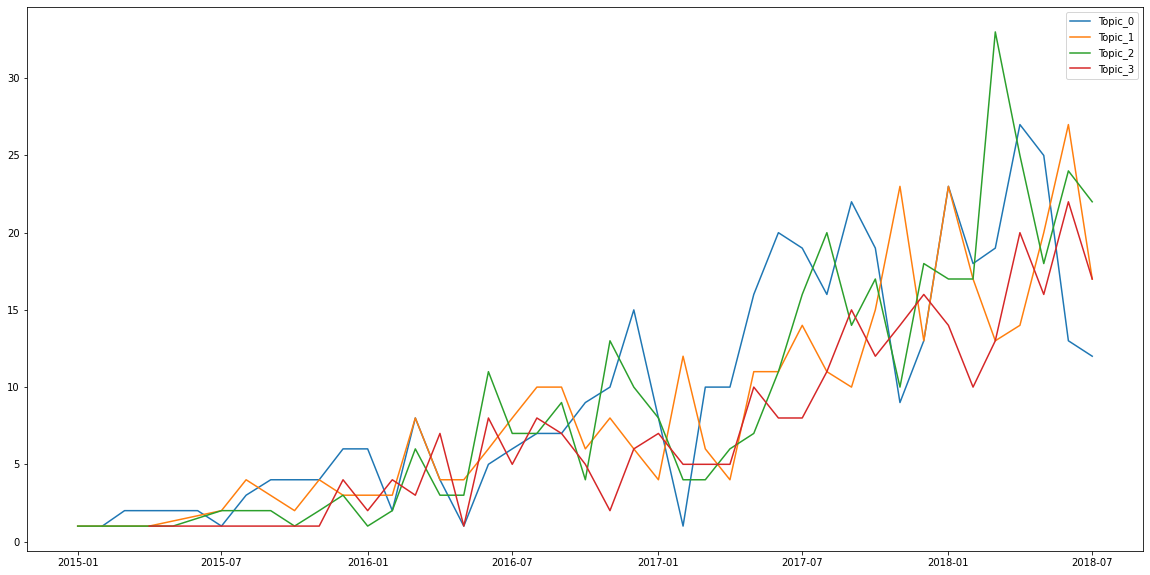

In [64]:
dff = df[['date','cleaned','topic']]
dff = df[df['date']>'2012'] # removing the 2 reviews from 2011; the plot will look better with out them
dff.date = df.date.dt.strftime('%Y-%m')
#dff['date'] = dff['date'].dt.to_timestamp()
dff = dff.sort_values(by=['date']).reset_index(drop=True)
dff_1 = dff[dff['topic'] == 'topic_0']
dff_2 = dff[dff['topic'] == 'topic_1']
dff_3 = dff[dff['topic'] == 'topic_2']
dff_4 = dff[dff['topic'] == 'topic_3']

dff_1 = dff_1.groupby('date')['topic'].count().reset_index(name='count')
dff_2 = dff_2.groupby('date')['topic'].count().reset_index(name='count')
dff_3 = dff_3.groupby('date')['topic'].count().reset_index(name='count')
dff_4 = dff_4.groupby('date')['topic'].count().reset_index(name='count')

dff_1["date"] = pd.to_datetime(dff_1["date"])
dff_2["date"] = pd.to_datetime(dff_2["date"])
dff_3["date"] = pd.to_datetime(dff_3["date"])
dff_4["date"] = pd.to_datetime(dff_4["date"])

plt.figure(figsize=(20,10))


plt.plot(dff_1['date'],dff_1['count'],label='Topic_0')  #Topic_0
plt.plot(dff_2['date'],dff_2['count'],label='Topic_1')  #Topic_1
plt.plot(dff_3['date'],dff_3['count'],label='Topic_2')  #Topic_2
plt.plot(dff_4['date'],dff_4['count'],label='Topic_3')  #Topic_3

plt.legend()

The Topic seems to follow the same frequency. Around the beggining of the year there is a small decrease when summer period most of the get high peaks.

# The code below is deprecated

### Checking the for common bi-grams using the gensim Phrase
It is not really a bigram; it just returns popular bigrams (phrase)

In [53]:
from gensim.models import Phrases

documents = reviews

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(documents, min_count=1)
for idx in range(len(documents)):
    for token in bigram[documents[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            documents[idx].append(token)

documents = [[doc.replace("_", " ") for doc in docs] for docs in documents]
print(documents)

dictionary = corpora.Dictionary(documents)
print(dictionary.token2id)

[['national', 'rail', 'occasion', 'staff', 'unpleasant', 'incompetent', 'helpful', 'platform', 'information', 'general', 'customer', 'service', 'skill', 'national rail', 'customer service'], ['national', 'rail', 'several', 'train', 'none', 'adviser', 'english', 'website', 'load', 'train', 'train', 'guard', 'many', 'people', 'central', 'plane', 'flight', 'catch', 'next', 'morning', 'bad', 'run', 'station', 'train', 'time', 'reason', 'stick', 'journey', 'way', 'tomorrow', 'shoulder', 'member', 'public', 'train', 'guard', 'many', 'train', 'reason', 'home', 'foot', 'national rail', 'many people', 'catch next'], ['travel', 'central', 'ticket', 'train', 'time', 'one', 'staff', 'apologise', 'ticket', 'staff', 'awful', 'detail', 'birth', 'pay', 'fine', 'problem', 'fine', 'man', 'sarcastic', 'criminal', 'unfair', 'people', 'human', 'job', 'human', 'communication', 'day', 'travel central'], ['single', 'trip', 'nationalrail', 'specific', 'train', 'cheap', 'journey', 'easy', 'use', 'good', 'good']

In [54]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews]

In [55]:
#Build LDA model
lda_model_bi = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=3, passes=50)

In [56]:
lda_model_bi.print_topics()

[(0,
  '0.017*"train" + 0.014*"rail" + 0.013*"service" + 0.011*"staff" + 0.010*"southern" + 0.010*"time" + 0.008*"delay" + 0.008*"company" + 0.007*"eurostar" + 0.007*"bad"'),
 (1,
  '0.047*"train" + 0.045*"ticket" + 0.025*"service" + 0.020*"customer" + 0.019*"virgin" + 0.013*"time" + 0.010*"company" + 0.009*"day" + 0.009*"website" + 0.009*"bad"'),
 (2,
  '0.060*"train" + 0.027*"service" + 0.019*"time" + 0.016*"seat" + 0.016*"class" + 0.015*"first" + 0.012*"journey" + 0.012*"staff" + 0.010*"virgin" + 0.009*"hour"')]

In [57]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_bi, doc_term_matrix, dictionary)
vis

c:\program files\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.048927  0.086933       1        1  46.503449
2     -0.070292 -0.077133       2        1  43.018372
0      0.119219 -0.009801       3        1  10.478179, topic_info=         Term        Freq       Total Category  logprob  loglift
62     ticket  649.000000  649.000000  Default  30.0000  30.0000
294     class  191.000000  191.000000  Default  29.0000  29.0000
270     first  189.000000  189.000000  Default  28.0000  28.0000
10       rail  108.000000  108.000000  Default  27.0000  27.0000
331  southern  109.000000  109.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
100       due   11.282010  110.448580   Topic3  -5.5434  -0.0255
133    minute   10.784390  130.220164   Topic3  -5.5885  -0.2353
33     people   10.913976  165.919760   Topic3  -5.5766  -0.4656
142   railway    9.260396   43.045748   Topic3  -5.7409   0.7194
197    refund    9.582070  123.111482   Topic3  -5.7068  -0.2973

[238 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2531      3  0.676421  acknowledgement
543       1  0.049047              air
543       2  0.931897              air
190       1  0.967325              app
190       2  0.037205              app
...     ...       ...              ...
160       1  0.242063            world
160       3  0.726189            world
216       1  0.389233             year
216       2  0.558899             year
216       3  0.059882             year

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

 Increasing the number for the bi- lda at 4

In [58]:
#Build LDA model
lda_model_bi_4 = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, passes=50)

In [59]:
lda_model_bi_4.print_topics()

[(0,
  '0.044*"service" + 0.041*"train" + 0.025*"bad" + 0.021*"southern" + 0.020*"company" + 0.014*"time" + 0.014*"day" + 0.013*"rail" + 0.010*"work" + 0.010*"delay"'),
 (1,
  '0.070*"train" + 0.019*"service" + 0.018*"virgin" + 0.016*"journey" + 0.014*"class" + 0.012*"first" + 0.012*"time" + 0.010*"carriage" + 0.009*"hour" + 0.008*"customer"'),
 (2,
  '0.041*"ticket" + 0.040*"train" + 0.022*"service" + 0.020*"time" + 0.016*"customer" + 0.015*"staff" + 0.013*"virgin" + 0.013*"seat" + 0.009*"website" + 0.009*"day"'),
 (3,
  '0.049*"train" + 0.022*"ticket" + 0.016*"service" + 0.013*"customer" + 0.012*"hour" + 0.012*"virgin" + 0.010*"time" + 0.007*"price" + 0.007*"journey" + 0.006*"station"')]

In [60]:


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_bi_4, doc_term_matrix, dictionary)
vis

c:\program files\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.079222 -0.056184       1        1  46.653997
1     -0.044010 -0.022063       2        1  24.822298
0      0.137001 -0.028817       3        1  17.381101
3     -0.013769  0.107064       4        1  11.142604, topic_info=          Term         Freq        Total Category  logprob  loglift
44       train  1338.000000  1338.000000  Default  30.0000  30.0000
62      ticket   644.000000   644.000000  Default  29.0000  29.0000
331   southern   109.000000   109.000000  Default  28.0000  28.0000
16         bad   193.000000   193.000000  Default  27.0000  27.0000
11     service   671.000000   671.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
212      month     9.648825    83.332560   Topic4  -5.7613   0.0384
2850  eurostar     9.869621   112.379157   Topic4  -5.7387  -0.2380
120    company    10.149945   202.567140   Topic4  -5.7107  -0.7992
100        due     9.543444   110.125914   Topic4  -5.7723  -0.2514
213       seat     9.741413   233.103627   Topic4  -5.7517  -0.9807

[314 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2014      2  0.893907  acceptable
1447      4  0.867215         act
683       1  0.904790       admin
333       1  0.920973       adult
543       1  0.099929         air
...     ...       ...         ...
216       1  0.400103        year
216       2  0.400103        year
216       3  0.170044        year
216       4  0.030008        year
2950      2  0.921903   yorkshire

[505 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

1 and 2 are overlapping

In [61]:
#Build LDA model
lda_model_bi_5 = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, passes=50)

In [62]:
lda_model_bi_5.print_topics()

[(0,
  '0.050*"train" + 0.044*"service" + 0.034*"time" + 0.018*"bad" + 0.016*"customer" + 0.015*"company" + 0.014*"southern" + 0.012*"day" + 0.012*"staff" + 0.010*"rail"'),
 (1,
  '0.067*"ticket" + 0.027*"train" + 0.021*"customer" + 0.021*"service" + 0.015*"refund" + 0.012*"website" + 0.011*"virgin" + 0.011*"time" + 0.009*"email" + 0.009*"day"'),
 (2,
  '0.079*"train" + 0.023*"virgin" + 0.022*"service" + 0.019*"seat" + 0.019*"class" + 0.017*"first" + 0.016*"journey" + 0.015*"ticket" + 0.011*"time" + 0.010*"hour"'),
 (3,
  '0.020*"staff" + 0.018*"virgin" + 0.011*"day" + 0.011*"train" + 0.009*"passenger" + 0.007*"rude" + 0.007*"newcastle" + 0.006*"eurostar" + 0.006*"star" + 0.006*"poor"'),
 (4,
  '0.009*"customer" + 0.008*"point" + 0.007*"seat" + 0.007*"people" + 0.007*"train" + 0.007*"new" + 0.007*"eurostar" + 0.006*"expensive" + 0.005*"service" + 0.005*"bus"')]

In [63]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_bi_5, doc_term_matrix, dictionary)
vis

c:\program files\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.056385 -0.001201       1        1  37.015786
1      0.111082  0.025588       2        1  25.809424
0      0.084153 -0.019969       3        1  24.970941
3     -0.118538 -0.115651       4        1   6.203584
4     -0.133082  0.111233       5        1   6.000265, topic_info=         Term        Freq       Total Category  logprob  loglift
62     ticket  653.000000  653.000000  Default  30.0000  30.0000
294     class  194.000000  194.000000  Default  29.0000  29.0000
645    virgin  363.000000  363.000000  Default  28.0000  28.0000
13      staff  258.000000  258.000000  Default  27.0000  27.0000
213      seat  231.000000  231.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
11    service    8.536510  688.423477   Topic5  -5.2648  -1.5767
204  carriage    5.787953   84.154830   Topic5  -5.6534   0.1365
142   railway    5.189824   43.934465   Topic5  -5.7625   0.6774
141     price    5.577976  109.866173   Topic5  -5.6903  -0.1671
120   company    5.461739  207.918444   Topic5  -5.7114  -0.8260

[381 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
466       1  0.065368  absolute
466       2  0.098053  absolute
466       3  0.784421  absolute
466       4  0.032684  absolute
496       2  0.929320   account
...     ...       ...       ...
216       1  0.434055      year
216       2  0.295947      year
216       3  0.236757      year
216       4  0.019730      year
216       5  0.019730      year

[670 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])

Lots of overlap as expected 